In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Esercizio 8.1

In questa esercitazione vogliamo utilizzare un metodo Monte Carlo variazionale per studiare un sistema quantistico in una dimensione, sottoposto all'azione di un potenziale dato dalla formula:
    $$
V(x) = x^4 - \frac{5}{2}x^2
$$
Per risolvere quindi il problema usiamo un approccio numerico, poichè non esiste soluzione analitica. 

#### Metodi Montecarlo variazionale
Utilizziamo quindi un Monte Carlo variazionale: calcolando l'energia $E_T$ di un qualsiasi configurazione del sistema sistema, ad esempio ipotizzando una funzione di prova dipendente da alcuni parametri e variandoli, sarà sempre maggiore dell'energia del ground-state $E_0$:

$$E_T > E_0$$

dove possiamo valutare l'energia del sistema tramite la:

$$
{\hat E}_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

Dove l'operatore hamiltoniana può essere scritto come:
$$H=T+V$$
dove il potenziale è quello riportato sopra, e l'operatore energia cinetica possiamo scriverlo come:
$$T = -\frac{1}{2m}\frac{\partial^2}{\partial^2 x}$$
Pertanto, utilizziamo un modello approssimato per la funzione del ground state che è la seguente funzione di prova ("trial function"):

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

e quindi $\Psi_T^{\sigma,\mu}(x)$ dipende da due parametri: $\sigma$, e $\mu$ la larghezza e il valor medio delle gaussiane.


Andiamo quindi a valutare la funzione d'onda tramite l'algoritmo di Metropolis con una probabilità di transizione uniforme e rispondiamo alla prima richiesta di valutare l'energia del sistema:

Text(0, 0.5, 'U/N')

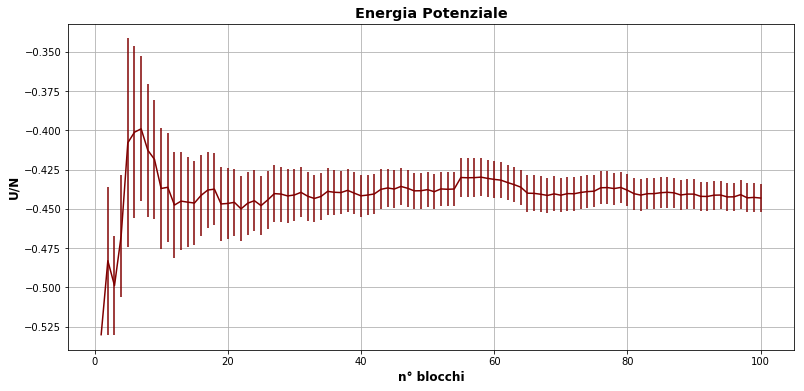

In [2]:
x, E_t , err =np.loadtxt("H.dat", usecols=(0,2,3), unpack=True)
plt.figure(figsize=(13,6))
plt.errorbar(x,E_t,err,color="maroon")
plt.grid(True)
plt.title("Energia Potenziale",weight="bold",size="x-large")
plt.xlabel("n° blocchi", weight="bold",size="large")
plt.ylabel("U/N", weight="bold",size="large")


$\textbf{oss}$: i parametri utilizzati sono, come al solito, inseriti in un file di input, in questo caso con il nome di "settings.dat". Inoltre sono stati utilizzati 100 blocchi da 1000 step l'uno. Come al solito l'accettanza è attorno al 50% e per raggiungere ciò è stato scelto uno step $\delta =2.5$. L'algoritmo parte dal punto $x=1$. ($\mu$ è stata momentaneamente fissata ad 1 solo al fine di questo esercizio).

# Esercizio 8.2

Procediamo ora a variare i parametri della funzione d'onda per trovare il minimo dell'energia.

La griglia di ricerca, dopo aver fatto alcuni tentativi a maglie più larghe, per i due parametri è stata impostata tra:
- mu $\in \left[0.5,0.8 \right]$
- sigma $\in \left[0.6,0.9 \right]$

con passi di 0.002.

Vogliamo confrontare la funzione d'onda, calcolata analiticamente dai parametri trovati, con quella invece risultante dall'istogramma delle posizioni sempre per i parametri migliori e quella invece ottenuta con il metodo consistente nel trasformare l'equazione di Schoredinger  in un'equazione matriciale.

In [3]:
bestmu, bestsigma= np.loadtxt("bestpar.dat")
print("Il miglior valore del parametro mu è: ",bestmu)
print("Il miglior valore del parametro sigma è: ",bestsigma)
print("L'energia del ground state stimata è: ",E_t[E_t.size-1])

Il miglior valore del parametro mu è:  0.792
Il miglior valore del parametro sigma è:  0.592
L'energia del ground state stimata è:  -0.443105


In [4]:
##funzioni per integrazione
def Vpot(x):
    return (x**2 - 2.5)*x**2
   
def Psi2(x, mu, std):
    uno = np.exp(-0.5*(x-mu)**2/(std**2))
    due = np.exp(-0.5*(x+mu)**2/(std**2))
    return (uno + due)**2

Ground state energy:  -0.46163548314319264
1st excited state energy:  0.09391283430981058
2nd excited state energy:  1.9600374405104195


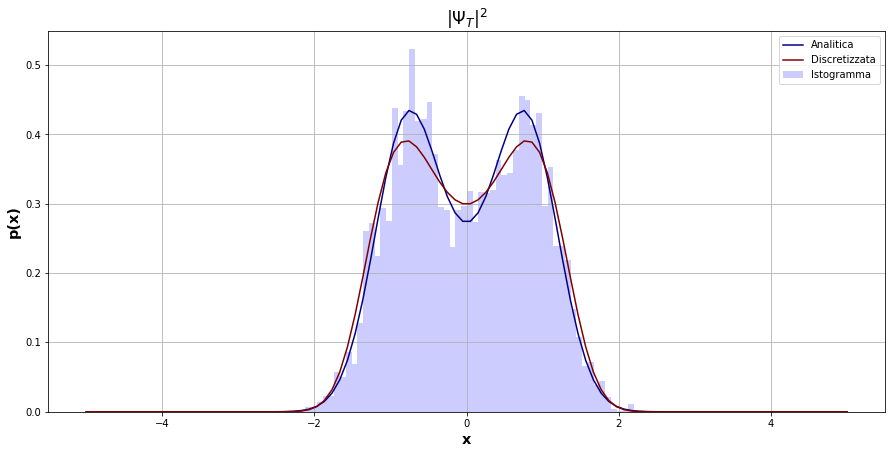

In [5]:
##discretizzata
hbar = 1
m = 1
a = 10
N = 100

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

##normalizzazione 
Normalizz= lambda x: Psi2(x, bestmu, bestsigma)
norm, error=integrate.quad(Normalizz, -2, 2)

##analitica
Analytic=[]
for i in range(N):
    Analytic.append(Psi2(x[i], bestmu, bestsigma)/norm)
#################################################################################
fig=plt.figure(figsize=(15, 7))
ps=np.loadtxt("x.dat")
plt.hist(ps,60, color='blue', alpha=0.2, density=True, label='Istogramma')
plt.plot(x,Analytic, label='Analitica', color='navy')
plt.plot(x,(psi[0])**2,color="maroon",label ="Discretizzata")
plt.title('$|\Psi_T|^2$',weight="bold",size="xx-large")
plt.xlabel('x',weight="bold",size="x-large")
plt.ylabel('p(x)',weight="bold",size="x-large")
plt.grid(True) 
plt.legend()
plt.show()

Si può notare che la soluzione analitica e quella fatta con le posizioni dell'istogramma sono simili, ma la soluzione discretizzata si discosta leggermente da esse.

# Esercizio 8.3

Nell'ultimo esercizio vogliamo invece utilizzare due algoritmi(PIGS/PIMC) per studiare il sistema.
Innanzitutto usiamo il codice di Path Integral Ground State (PIGS) a temperatura nulla per confrontare il risultato con quello ottenuto in precedenza tramite il metodo Monte Carlo Variazionale.
Vogliamo quindi confrontare nello specifico l'energia $E_T$ e il modulo quadro della funzione d'onda.

#### PIGS
Modifichiamo il codice cambiando il potenziale e confrontando due casi:
- funzione di prova costante
- funzione di prova: somma di gaussiane con i parametri trovati in precedenza, la "trial function" già usata nell'esercio 8.2 con i migliori $\mu$ e $\sigma$ derivanti dal processo variazionale

A partire dagli output dell'algoritmo calcoliamo l'energia totale come somma dell'energia potenziale e di quella cinetica.

In [6]:
x_k, y_k, err_k = np.loadtxt('QMC_1D/Const/kinetic.dat', usecols=(0,1,2), unpack=True)
x_p, y_p, err_p = np.loadtxt('QMC_1D/Const/potential.dat', usecols=(0,1,2), unpack=True)
x_pr1, y_pr1, err_pr1 = np.loadtxt('QMC_1D/Const/probability.dat', usecols=(0,1,2), unpack=True)

x1=x_k
H1=y_k+y_p
err_1=(err_k**2+err_p**2)**0.5 

x_k, y_k, err_k = np.loadtxt('QMC_1D/Nonconst/kinetic.dat', usecols=(0,1,2), unpack=True)
x_p, y_p, err_p = np.loadtxt('QMC_1D/Nonconst/potential.dat', usecols=(0,1,2), unpack=True)
x_pr2, y_pr2, err_pr2 = np.loadtxt('QMC_1D/Nonconst/probability.dat', usecols=(0,1,2), unpack=True)

x2=x_k
H2=y_k+y_p
err_2=(err_k**2+err_p**2)**0.5 

In [7]:
ye1m=np.mean(H1)
ye2m=np.mean(H2)

print("Confronto tra valori ottenuti:")
print("Valore da discretizzazione della funzione d'onda: -0.46046 ")
print("Valore da metodo variazionale: ",E_t[E_t.size-1]," Err:", err[E.size-1])
print("Valore da PIGS (funzione costante): ", ye1m, " Err:", err_1.std()/err_2.size**0.5)
print("Valore da PIGS (funzione somma di gaussiane): ", ye2m, " Err:", err_2.std()/err_2.size**0.5)


Confronto tra valori ottenuti:
Valore da discretizzazione della funzione d'onda: -0.46046 
Valore da metodo variazionale:  -0.443105  Err: 0.00901521
Valore da PIGS (funzione costante):  -0.45001434866666673  Err: 0.0019067438212732274
Valore da PIGS (funzione somma di gaussiane):  -0.4533720682333333  Err: 0.001851557453987056


Confrontiamo ora le funzioni d'onda e sovrapponiamo l'andamento dell'energia per l'algoritmo PIGS con l'ultimo valore del vettore di energie per il Monte Carlo variazionale (quello che fa la media su tutti i blocchi) e con il valore dell'energia del ground state ottenuta con il metodo della discretizzazione della funzione d'onda.

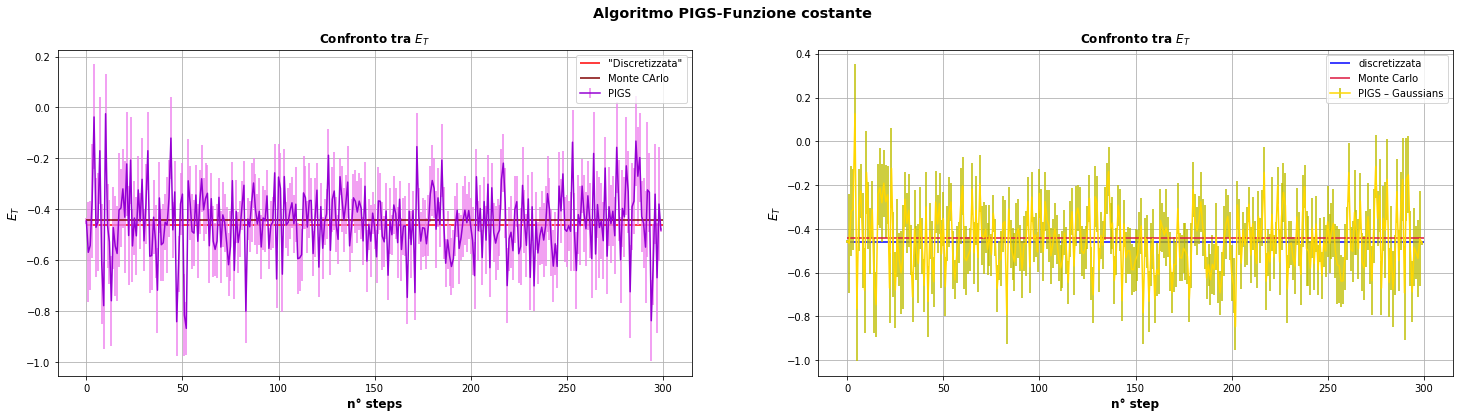

In [15]:
fig=plt.figure(figsize=(25,6))
plt.suptitle("Algoritmo PIGS-Funzione costante", weight='bold', size='x-large')

plt.subplot(121)
plt.title("Confronto tra $E_T$", weight='bold',size="large")
plt.hlines(-0.460465879, 0, x_k.size, label='"Discretizzata"', color='red')
plt.errorbar(x1,H1,yerr=err_1, color='Darkviolet', label='PIGS', ecolor='violet')
plt.hlines(E_t[E_t.size-1], 0, x_k.size, color='maroon', label='Monte CArlo')
plt.ylabel('$E_T$', weight='bold',size="large")
plt.xlabel('n° steps', weight='bold',size="large")
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.title("Confronto tra $E_T$", weight='bold',size="large")
plt.hlines(-0.460465879, 0, x_k.size, label="discretizzata", color='blue')
plt.errorbar(x2,H2,yerr=err_2, color='gold', label='PIGS – Gaussians',ecolor="y")
plt.hlines(E_t[E_t.size-1], 0, x_k.size, color='crimson', label='Monte Carlo') 
plt.ylabel('$E_T$', weight='bold',size="large")
plt.xlabel("n° step", weight='bold',size="large")
plt.grid(True)
plt.legend()

plt.show()

In entrambi i casi l'energia calcolata dall'algoritmo PIGS oscilla attorno ai valori calcolati con gli altri metodi.

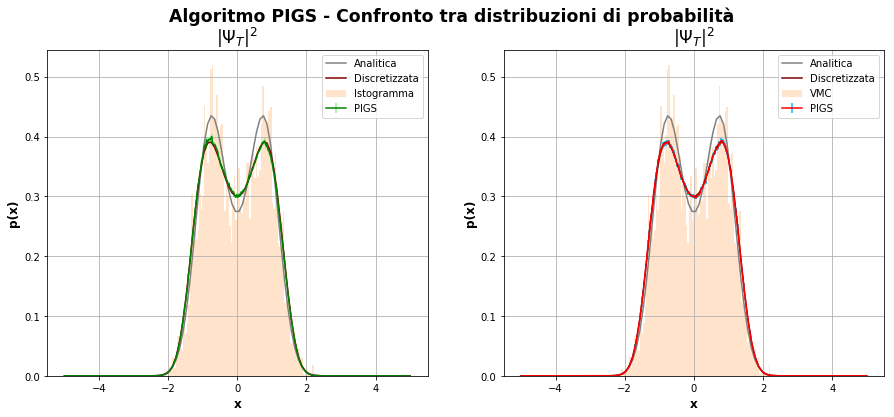

In [12]:
fig=plt.figure(figsize=(15,6))
plt.suptitle("Algoritmo PIGS - Confronto tra distribuzioni di probabilità", weight='bold', size='xx-large')




plt.subplot(121)
plt.hist(ps,100, color='peachpuff', alpha=0.75, density=True, label='Istogramma')
plt.errorbar(x_pr2, y_pr2,yerr=err_pr2, color='green', label='PIGS', ecolor='lightgreen')
plt.plot(np.linspace(-5,5,100),Analytic, label='Analitica', color='grey')
plt.plot(x,(psi[0])**2,color="maroon",label ="Discretizzata")
plt.title('$|\Psi_T|^2$', weight='bold',size="xx-large")
plt.xlabel('x', weight='bold',size="large")
plt.ylabel('p(x)', weight='bold',size="large")
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.hist(ps,100, color='peachpuff', alpha=0.75, density=True, label='VMC')
plt.errorbar(x_pr1, y_pr1,yerr=err_pr1, color='red', label='PIGS', ecolor='deepskyblue')
plt.plot(np.linspace(-5,5,100),Analytic, label='Analitica', color='grey')
plt.plot(x,(psi[0])**2,color="maroon",label ="Discretizzata")
plt.title('$|\Psi_T|^2$', weight='bold',size="xx-large")
plt.xlabel('x', weight='bold',size="large")
plt.ylabel('p(x)', weight='bold',size="large")
plt.grid(True)
plt.legend()






plt.show()



Si è cercato di mantenere l'accettanza dell'algoritmo attorno al $50\%$. 

Come si nota vi è ottima concordanza tra PIGS e il metodo discretizzato, per entrambe le funzioni d'onda.
Controlliamo ora la differenze sul tempo immaginario, usando la seconda funzione d'onda, tenendo fissi gli altri parametri:

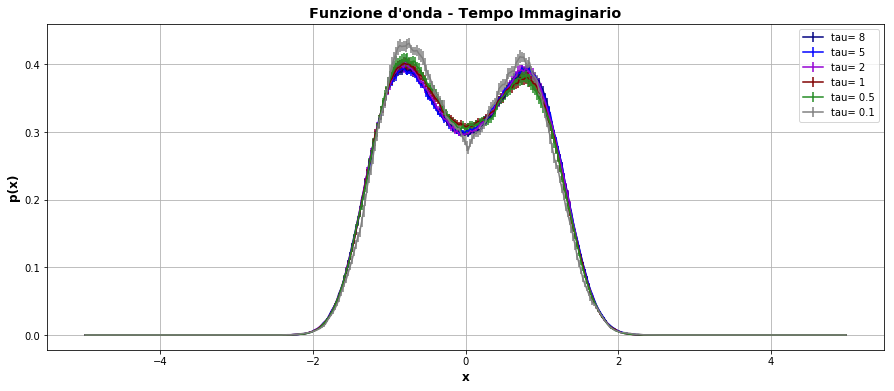

In [10]:
color=['navy',"blue","darkviolet","maroon","forestgreen","grey"]
tau=["8","5","2","1","0.5","0.1"]
plt.figure(figsize=(15,6))
for i in range(6):

    plt.title("Funzione d'onda - Tempo Immaginario",weight="bold",size="x-large")
    xp_tau, yp_tau, errp_tau = np.loadtxt("tau/"+tau[i]+"probability.dat", usecols=(0,1,2), unpack=True)
    plt.errorbar( x=xp_tau, y=yp_tau, yerr=errp_tau,color=color[i],label="tau= "+tau[i])
    plt.legend()
    plt.xlabel('x', weight='bold',size="large")
    plt.ylabel('p(x)', weight='bold',size="large")
    plt.grid(True)


Dal grafico sembra che il tempo immaginario minore di 0.5 porti a una funzione d'onda non più così precisa, pertanto questo potrebbe essere il limite alla decrescita del tempo immaginario. In effetti l'idea dell'algoritmo PIGS è che il ground state sia l'evoluzione per un tempo immaginario sufficiente dello stato di prova. Una funzione più simile a quella del ground state mi aspetto che "converga" in un tempo immaginario minore della funzione costante e quindi posso abbassarlo. Ciò non vuol dire però che possa essere fatto indiscriminatamente: sotto a una certa soglia l'algoritmo sarà apprezzabilemente lontano dal risultato che vogliamo ottenere.

#### PIMC

Vogliamo ora utilizzare l'algoritmo PIMC (Path Integral Monte Carlo) per studiare l'andamento del modulo quadro della funzione d'onda al variare della temperatura.
Andiamo quindi a modificare la temperatura nel file di input, da 0 fino ad arrivare a 50, passando per alcuni valori intermedi.

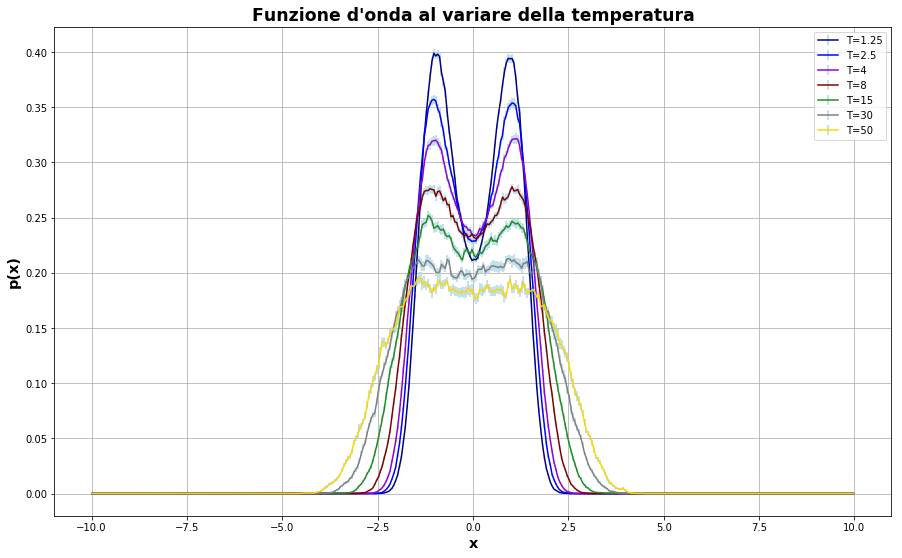

In [11]:

color=['navy',"blue","darkviolet","maroon","forestgreen","grey","gold"]

##temperature!
temp=[1.25,2.5,4,8,15,30,50]

fig=plt.figure(figsize=(15,9))
for i in range(7):
    x_pimc, y, err = np.loadtxt('QMC_1D/Pimc/'+str(temp[i])+'probability.dat', usecols=(0,1,2), unpack=True)
    plt.errorbar(x_pimc, y,yerr=err, color=color[i], label='T='+str(temp[i]), ecolor='lightblue')
    
plt.title("Funzione d'onda al variare della temperatura", weight='bold', size='xx-large')
plt.xlabel('x',weight="bold",size="x-large")
plt.ylabel('p(x)',weight="bold",size="x-large")
plt.grid(True)
plt.legend()

Si può notare che la funzione si appiattisce all'aumentare della temperatura, ovvero raggiunge distanze più ampie, come è normale aspettarsi visto che le velocità aumentano. A tal proposito si può guardare la curva alla temperatura più alta ($T=50$) in oro.